# Example of clustering - image posterization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans

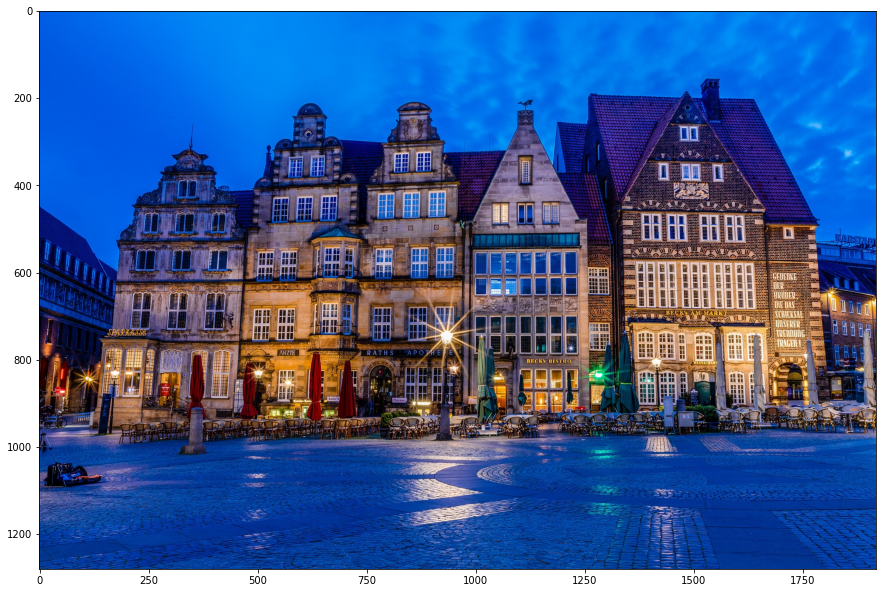

In [2]:
image = imread('sample_picture1.jpg')

plt.figure(figsize=(15,15))
plt.imshow(image)
plt.show()

In [3]:
all_pixels = image.reshape((-1,3))
unique_pixels = np.unique(all_pixels, axis=0)

all_pixels.shape, unique_pixels.shape, 256 ** 3

((2457600, 3), (406522, 3), 16777216)

In [4]:
NUMBER_OF_COLORS = 2

estimator = KMeans(n_clusters=NUMBER_OF_COLORS)

In [5]:
estimator.fit(all_pixels)

KMeans(n_clusters=2)

In [6]:
estimator.cluster_centers_

array([[ 92.5554966 ,  74.18813708,  84.0532853 ],
       [  9.00711802,  91.14786816, 196.35373441]])

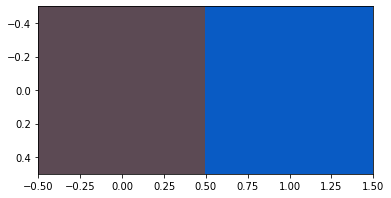

In [7]:
plt.imshow(estimator.cluster_centers_.reshape(1, NUMBER_OF_COLORS, 3) / 255)
plt.show()

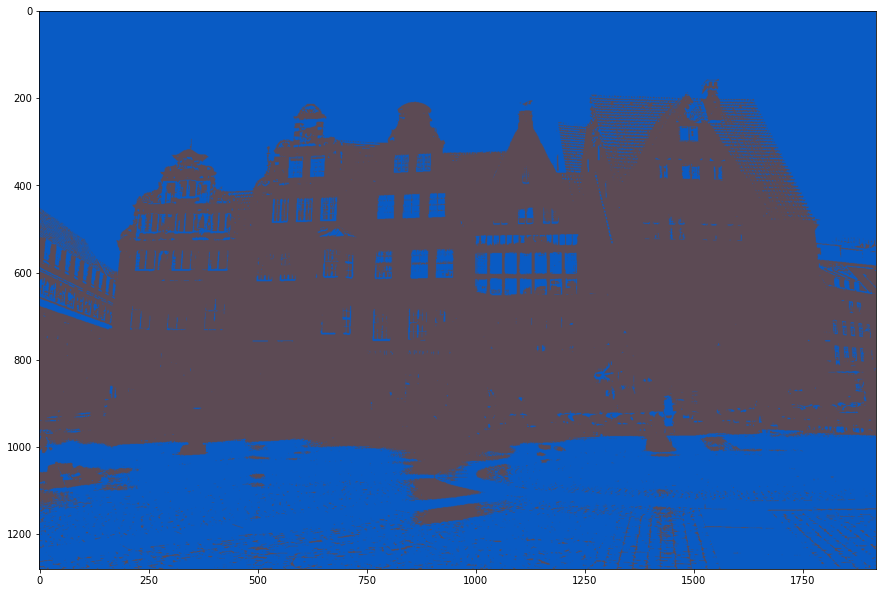

In [8]:
labels = estimator.predict(all_pixels)

new_pixels = estimator.cluster_centers_[labels]

new_image = new_pixels.reshape(image.shape)

plt.figure(figsize=(15,15))
plt.imshow(new_image / 255)
plt.show()

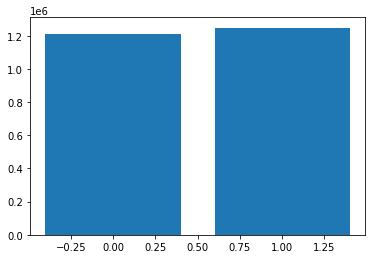

In [9]:
x, y = np.unique(labels, return_counts=True)
plt.bar(x, y)
plt.show()